[![CC BY-NC-SA 4.0][cc-by-nc-sa-shield]][cc-by-nc-sa]

<!-- [![CC BY-NC-SA 4.0][cc-by-nc-sa-image]][cc-by-nc-sa] -->

[cc-by-nc-sa]: http://creativecommons.org/licenses/by-nc-sa/4.0/
[cc-by-nc-sa-image]: https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png
[cc-by-nc-sa-shield]: https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg


In [1]:
from qiskit_utils import *

## **Quantum Palindrome Checking**

In this problem our aim is to devise a quantum algorithm which can recognise whether a given string sequence is palindromic or not. To check whether a given sequence is a palindrome or not is a classic programming problem, however here I will try to elaborate a technique using which we can not only check classical strings but also more genralised string of quantum alphabets. 

For an quantum algorithm that solves this problem for calssical binary strings check out the \href{https://github.com/qosf/monthly-challenges}{qosf-monthly-challenges} repo.

### **Quantum Alphabets**

In the usual classical sense an alphabet could be any finite set distinguishable symbols, for eg. $\mathcal{A}:$ {`a`, `b`, `c`, `d`, `e`} or $\mathcal{A}:$ {`1`, `2`, `3`}, etc. To generalise this idea to include quantum states we can say than an *quantum alphabet* is a set of distinct of quantum states, for eg. $\mathcal{A}:$ {$\ket{\phi_1}$,$\ket{\phi_2}$,$\ket{\phi_3}$}. However note that that here 'distinct' doesn't necessarily mean orthogonal, so even while the quantum states are distinct in the sense that $ \ket{\phi_2} \neq \ket{\phi_1}$, they might not be classicaly distiguishable.

For eg. $\mathcal{A}:$ {$ \ket{\phi_1} = \: \ket{0} + e^{-i \frac{\pi}{2}} \ket{1}$, $\ket{\phi_2} = \:\ket{0} + e^{-i \pi}\ket{1}$, $\ket{\phi_3} = \: \ket{0} + e^{-i \frac{3\pi}{2}}\ket{1}$}

### **Palindrome Checking**

Ususally the strings we need to check would be of the strings of the form `1324321` or `abdcdab` ,etc. The usual way of handling them is to iteratively compare the subsquent bits of the original string against the reversed string. Since classical strings whatever be number or alphabets can be always decompsed into binary representations, it suffices to run the palindrome checking algorithm on the binary representation of the string. For eg. given a binary string `101100` we can compare it bitwise with the string `001101` to check if it is palindromic.

However given a string of quantum alphabet , say `str :`$\mathtt{\ket{\phi_2}\ket{\phi_1}\ket{\phi_3}\ket{\phi_2}}$ a qubit-wise comparison might not be very effecient or even possible given the non-orthogoal nature of the quantum alphabets. Thus we will try to use a different approach more sutied for quantum states and also highlight whether such an algorithm could have a quantum advantage.

#### **Algorithm**
Before moving onto the quantum algorithm there are some assumptions we need to make,
1. The length of the string needs to be a dyadic i.e a power of 2. Though this might not very          convenient we can always pad a regular string to this form. 
2. 

Here I will describe the algorithm using an example and later point towards a possible generalisation.

**Step 1:** The first thing to do would be to load the elements of the quantum string into the memory using the QRAM implementations. For example if the string is `str :`$\mathtt{\ket{\phi_2}\ket{\phi_1}\ket{\phi_3}\ket{\phi_2}}$ the corresponding QRAM encoding would be, 
$$          \ket{\mathtt{data}} = \mathtt{ \ket{\phi_2}\ket{00} + \ket{\phi_1}\ket{01} + \ket{\phi_3}\ket{10} + \ket{\phi_2}\ket{11}  }
$$


**Step 2:**  Now to check whether the given string is a palidrome we should essentially compare the elements for which the data-registers are farthest apart, i.e compare the data at $\mathtt{\ket{00}}$ with the data at $\mathtt{\ket{11}}$ and the data at $\mathtt{\ket{01}}$ with the data at $\mathtt{\ket{10}}$ and so on. 

 Incase if all of them match up we can say that the quantum string is a palindrome, for our case the data-elements at $\mathtt{\ket{11}}$ and $\mathtt{\ket{00}}$ match up and is equal to $\mathtt{\ket{\phi_2}}$ wheras the data-elements at $\mathtt{\ket{10}}$ and $\mathtt{\ket{01}}$ are different.

 To do this comparison here we introduce an ancilla qubit $\ket{\mathtt{ancilla_1}}$ initiated in $\ket{\mathtt{0}}$, and then do CNOT on it controlled on the most significant bit of the adress register
 $$     \ket{\mathtt{data}}  =  \mathtt{ \ket{\phi_2}\ket{00}\ket{0} + \ket{\phi_1}\ket{01}\ket{0} + \ket{\phi_3}\ket{10}\ket{1} + \ket{\phi_2}\ket{11}\ket{1}}
 $$

Next controlled on $\mathtt{\ket{ancilla_1}}$ we do a CNOT on the elements of the adress register,
$$
  \ket{\mathtt{data}} = \mathtt{ \ket{\phi_2}\ket{00}\ket{0} + \ket{\phi_1}\ket{01}\ket{0} + \ket{\phi_3}\ket{01}\ket{1} + \ket{\phi_2}\ket{00}\ket{1}} \\
  
$$

this can reshuffled into 
$$ \ket{\mathtt{data}} =  \mathtt{ \ket{00}\left(\ket{\phi_2}\ket{0} + \ket{\phi_2}\ket{1} \right) + \ket{01} \left( \ket{\phi_1}\ket{0} + \ket{\phi_3}\ket{1} \right) }  \\
$$

finally do a $\mathbf{\hat{H}}$ operation on the $\mathtt{\ket{ancilla_1}}$, 

$$ \ket{\mathtt{data}} =  \mathtt{ \ket{00}\left( \left( \ket{\phi_2} + \ket{\phi_2} \right)\ket{0} +
\left( \ket{\phi_2} - \ket{\phi_2} \right)\ket{1} \right) + \ket{01}\left( \left( \ket{\phi_3} + \ket{\phi_1} \right)\ket{0} +
\left( \ket{\phi_3} - \ket{\phi_1} \right)\ket{1} \right)}
$$

**Step 3:** The last step makes the necessary comparison between the elements as required for this checking. We can check the result of the comparison directly by looking at the $\mathtt{\ket{ancilla_1}}$ register since for states matching up they can never be found in the $\mathtt{\ket{1}}$ state,

$$ \ket{\mathtt{data}} =  \mathtt{ \ket{00}\left( \left( \ket{\phi_2} + \ket{\phi_2} \right)\ket{0}
 \right) + \ket{01}\left( \left( \ket{\phi_3} + \ket{\phi_1} \right)\ket{0} +
\left( \ket{\phi_3} - \ket{\phi_1} \right)\ket{1} \right)}
$$

Once the above mentioned state is prepared we can measure the $\mathtt{\ket{ancilla_1}}$ in the computational basis, if the quantum string is a palindrome then all the comparisons should be a success and thus can only be found in the state $\mathtt{\ket{0}}$. Even if we obtain a single $\mathtt{\ket{1}}$ we can infer that the string is not a palidrome.

We can also determine the indices at which the elements do not match-up by measuring the adress register alongwith the $\mathtt{\ket{ancilla_1}}$, however these would require more number of measureements than the former.

#### **Example**
Here I will give an implmentation of the above algorithm.

In [40]:
## INIT ##
quantum_alphabet = dict([('psi_1', RYGate( pi / 2, label= 'psi_1')), ('psi_2', RYGate( pi , label= 'psi_2')), ('psi_3', RYGate(3 * pi /2, label= 'psi_3'))])

data_reg = QuantumRegister(1, name= 'data-reg')
adress_reg = QuantumRegister(2, name= 'adress-reg')

qc = QuantumCircuit(data_reg, adress_reg)
qc.h(adress_reg)

qc.draw()

data-reg: ─────
              ┌───┐
adress-reg_0: ┤ H ├
              ├───┤
adress-reg_1: ┤ H ├
              └───┘

In [41]:
## STEP 1 ##
quantum_string = [ 'psi_2', 'psi_3', 'psi_1', 'psi_2' ]
for item in list(enumerate(quantum_string)):
    qc.barrier()
    bit_conditional(item[0], qc, adress_reg)
    qc.append( quantum_alphabet[item[1]].control(len(adress_reg)), [1,2,0]  )
    bit_conditional(item[0], qc, adress_reg)
    
qc.draw()

░      ┌──────────┐      ░      ┌────────────┐      ░      »
    data-reg: ──────░──────┤ psi_2(π) ├──────░──────┤ psi_1(π/2) ├──────░──────»
              ┌───┐ ░ ┌───┐└────┬─────┘┌───┐ ░      └─────┬──────┘      ░ ┌───┐»
adress-reg_0: ┤ H ├─░─┤ X ├─────■──────┤ X ├─░────────────■─────────────░─┤ X ├»
              ├───┤ ░ ├───┤     │      ├───┤ ░ ┌───┐      │       ┌───┐ ░ └───┘»
adress-reg_1: ┤ H ├─░─┤ X ├─────■──────┤ X ├─░─┤ X ├──────■───────┤ X ├─░──────»
              └───┘ ░ └───┘            └───┘ ░ └───┘              └───┘ ░      »
«              ┌────────────┐      ░ ┌──────────┐
«    data-reg: ┤ psi_1(π/2) ├──────░─┤ psi_2(π) ├
«              └─────┬──────┘┌───┐ ░ └────┬─────┘
«adress-reg_0: ──────■───────┤ X ├─░──────■──────
«                    │       └───┘ ░      │      
«adress-reg_1: ──────■─────────────░──────■──────
«                                  ░

In [42]:
## STEP 2 ##
qc.barrier()
ancilla_1 = QuantumRegister(1, name='ancilla_1')
qc.add_register(ancilla_1)

qc.cx(  adress_reg[1], ancilla_1[0])

qc.cx(ancilla_1[0], adress_reg[1])
qc.cx(ancilla_1[0], adress_reg[0])

qc.barrier()
qc.h(ancilla_1)

qc.draw()

░      ┌──────────┐      ░      ┌────────────┐      ░      »
    data-reg: ──────░──────┤ psi_2(π) ├──────░──────┤ psi_1(π/2) ├──────░──────»
              ┌───┐ ░ ┌───┐└────┬─────┘┌───┐ ░      └─────┬──────┘      ░ ┌───┐»
adress-reg_0: ┤ H ├─░─┤ X ├─────■──────┤ X ├─░────────────■─────────────░─┤ X ├»
              ├───┤ ░ ├───┤     │      ├───┤ ░ ┌───┐      │       ┌───┐ ░ └───┘»
adress-reg_1: ┤ H ├─░─┤ X ├─────■──────┤ X ├─░─┤ X ├──────■───────┤ X ├─░──────»
              └───┘ ░ └───┘            └───┘ ░ └───┘              └───┘ ░      »
   ancilla_1: ─────────────────────────────────────────────────────────────────»
                                                                               »
«              ┌────────────┐      ░ ┌──────────┐ ░                 ░      
«    data-reg: ┤ psi_1(π/2) ├──────░─┤ psi_2(π) ├─░─────────────────░──────
«              └─────┬──────┘┌───┐ ░ └────┬─────┘ ░           ┌───┐ ░      
«adress-reg_0: ──────■───────┤ X ├─░──────■───────░───────────┤ X ├─░──────
«                    │       └───┘ ░      │       ░      ┌───┐└─┬─┘ ░      
«adress-reg_1: ──────■─────────────░──────■───────░───■──┤ X ├──┼───░──────
«                                  ░              ░ ┌─┴─┐└─┬─┘  │   ░ ┌───┐
«   ancilla_1: ─────────────────────────────────────┤ X ├──■────■───░─┤ H ├
«                                                   └───┘           ░ └───┘

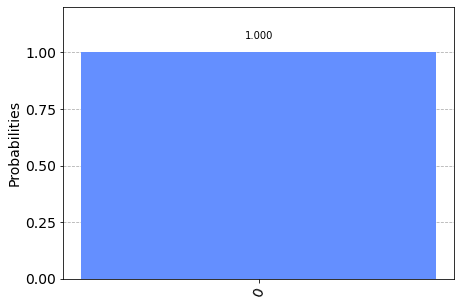

In [43]:
## STEP 3 ##
creg_check = ClassicalRegister(1, name= 'creg_check')
qc.add_register(creg_check)

shots = 10
qc_c = qc.copy()
qc_c.measure(ancilla_1, creg_check)
counts = execute(qc_c, qsm, shots= shots).result().get_counts()
plot_histogram(counts)


#### **Analysis and Discussions**
It is clear that the above algorithm could be generalised to any number of data elements given that it follows the required assumptions. Next, we can try to derive some performance gurantees to see whether our algorithm has an advantage over classical algorithms.

To start with, implementing the data-loading phase using QRAM would require $n$ multi-controlled toffoli gates acting on the data-register controlled by $log (n)$ qubits in the adress-register. This step might add excessive CNOT counts to the circuit and increase the depth drastically making it prone to decoherence errors when implemnted on NISQ devices, however given that QRAM is a widely accepted data-structure for quantum computers we will henceforth exclude cost of implementing it in our analysis.

Other than that the only contribution to the circuit-complexity comes from the $log (n)$ CNOT gates acting on the adress-register controlled by the ancilla.

However, the success of the algorithm depends explicitly on being able to sample the state of ancilla. In for a string of length $2^n$ the algorithm will make around $2^{n-1}$ comparisons and the result of the comparison would be readout to the entangled ancilla. If for instance all comparisons yield $\mathtt{\ket{0}}$ other than one $\mathtt{\ket{1}}$ the probability of measuring it would be around $\mathcal{P}_{\mathtt{\ket{1}}} \approx \frac{1}{2^{n-1}}$, thus in the worst case we need to run the circuit $\mathcal{O}(2^{n-1})$ times to correctly classify the string.

A possible workaround to this would be to use Quantum Amplitude Amplification to amplify the probability of getting $\mathtt{\ket{1}}$ in the ancilla, but this might in tutrn lead to increase in circuit depth of the algorithm.